### Pytania

1. Czy to normalne że się zapętla to drzewo? Co robić z tym: albo zakazywać stanów, a może zakazywać ruchów na jakiś czas (tak jak w TabuSearch)
2. Jeśli tak, to czy te gałęzie, które już odwiedziliśmy mamy po prostu omijać, czy je ewaluować? 
3. Czy ma sens dawać taką głębokość drzewa, że ostatnim ruchem jest ruch przeciwnika? Bo wtedy naturalnie zawsze gorsze ruchy będą, niż gdyby to o ostatnim ruchu decydował Max
4. Co oznacza adaptacyjność heurystyk
5. Czy strategia oznacza to, jak oceniamy szanse bez analizowania drzewa, tj. tylko na podstawie aktualnego stanu, czy też to, które ruchy wybieramy (normalnie testuje każdy możliwy ruch).
6. Czy alpha-beta powinno dawać taki sam ruch? Czy taką samą wartość (wtedy ruch może być inny)?
7. Czy to normalne, że pod koniec algorytm błądzi między tymi samymi stanami? Czy można np. zakazać mu przechodzić do stanu, jeśli przed chwilą tam był? (na wzór tabu-search)

Nie trzeba obliczać dla przeciwnika wartości. Czas dla roznych glebokosci, brak heurystyki. Dwa ruchy na raz  

Jakie rodzaje porównań stworzyć:
1. Ta sama strategia dla tej samej głębokości drzewa i tego samego algorytmu
2. Ta sama strategia dla tej róznej głębokości drzewa i tego samego algorytmu
3. Ta sama strategia dla tej samej głębokości drzewa i różnych algorytmów
4. Ta sama strategia dla tej różnej głębokości drzewa i różnych algorytmów
5. Różne strategie dla tej samej głębokości drzewa i tego samego algorytmu
6. Różne strategie dla tej różnej głębokości drzewa i tego samego algorytmu

Jak wizualizować porównania: 
- Na jednym wykresie porównywać różnych graczy w stosunku do tej samej zmiennej
- Na jednym wykresie porównać różne zmienne dla tego samego gracza 
- Porównać statystyki dla różnych graczy na tym samym wykresie

Która strategia wygrała najczęściej?
Który algorytm wygrał najczęściej?

In [160]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
halma_dir = Path('../../data/halma')

In [14]:
match_dir = halma_dir.joinpath('alphabeta-alphabeta/1-1/STRATEGY.DISTANCE-STRATEGY.DISTANCE')

In [16]:
str(match_dir)

'..\\..\\data\\halma\\alphabeta-alphabeta\\1-1\\STRATEGY.DISTANCE-STRATEGY.DISTANCE'

In [19]:
elements = str(match_dir).split('\\')
elements

['..',
 '..',
 'data',
 'halma',
 'alphabeta-alphabeta',
 '1-1',
 'STRATEGY.DISTANCE-STRATEGY.DISTANCE']

In [22]:
elements[-3].split('-')

['alphabeta', 'alphabeta']

In [247]:
def get_configuration(match_dir, date_prefix):
    elements = str(match_dir).split('\\')
    strategies, depths, algorithms = elements[-1].split('-'), elements[-2].split('-'), elements[-3].split('-')
    if os.path.exists(match_dir / f'{date_prefix}-stats'):
        match_results = pd.read_csv(match_dir / f'{date_prefix}-stats', sep=';', names=['Total moves', 'Winner'])
    else:
        match_results = pd.DataFrame(data={'Total moves': [len(player_white) + len(player_black)], 'Winner': ['None']})
    config = {
        'black': {
            'strategy': strategies[0].split('.')[1].lower(), 'depth': depths[0], 'algorithm': algorithms[0]
        }, 
        'white': {
            'strategy': strategies[1].split('.')[1].lower(), 'depth': depths[1], 'algorithm': algorithms[1]
        },
        'match': ''.join(elements[-3:]),
        'winner': match_results.loc[0, 'Winner']
    }
    
    return config

def add_metadata(dfs, players, match_dir, date_prefix):
    config = get_configuration(match_dir, date_prefix)
    for (df, player) in zip(dfs, players):
        df.player = player 
        df.strategy = config[player]['strategy']
        df.depth = config[player]['depth']
        df.algorithm = config[player]['algorithm']
        df.match = config['match']
        df.winner = config['winner']

In [248]:
def read_match(match_dir: Path, date_prefix: str):
    header = ['Move from', 'Move to', 'Compute time', 'Tree size', 'Eval value']
    player_black = pd.read_csv(match_dir / f'{date_prefix}-PLAYER.BLACK',
                                       names=header, sep=';')
    player_white = pd.read_csv(match_dir / f'{date_prefix}-PLAYER.WHITE',
                                       names=header, sep=';')
    for df in [player_black, player_white]:
        df['Jump size'] = df.apply(lambda x: jump_size(x.iloc[0], x.iloc[1]), axis=1)
    add_metadata([player_black, player_white], ['black', 'white'], match_dir, date_prefix)
    return player_black, player_white

In [231]:
from ai_data_eng.halma_game.utils import split

def jump_size(move_from, move_to):
    y_f, x_f = split(move_from)
    y_t, x_t = split(move_to)
    return abs(y_f-y_t) + abs(x_f - x_t)

In [249]:
player_black, player_white= read_match(halma_dir.joinpath('alphabeta-alphabeta/1-1/STRATEGY.DISTANCE-STRATEGY.DISTANCE'), '30-0909')

In [234]:
player_black.winner

'None'

In [6]:
match_results

,Total moves,Winner
0,34,None


In [78]:
player_white.reset_index().rename({'index': 'move'}, axis=1)

,move,Move from,Move to,Compute time,Tree size,Eval value,Jump size
0,0,"14,14","12,12",0.01,40,-412.61,4
1,1,"13,15","11,13",0.01,59,-408.51,4
2,2,"15,13","13,11",0.01,62,-404.42,4
3,3,"12,15","10,13",0.02,69,-400.33,4
4,4,"13,14","11,12",0.02,87,-396.24,4
5,5,"14,13","12,11",0.02,89,-392.15,4
6,6,"15,12","13,10",0.02,91,-388.06,4
7,7,"12,14","10,12",0.02,101,-383.97,4
8,8,"13,13","11,11",0.02,110,-379.89,4
9,9,"14,12","12,10",0.02,108,-375.80,4


In [79]:
player_white_long = pd.melt(player_white[['Compute time', 'Tree size', 'Eval value', 'Jump size']].reset_index().rename({'index': 'move'}, axis=1), id_vars=['move'],
        value_vars=['Compute time', 'Tree size', 'Eval value', 'Jump size'])

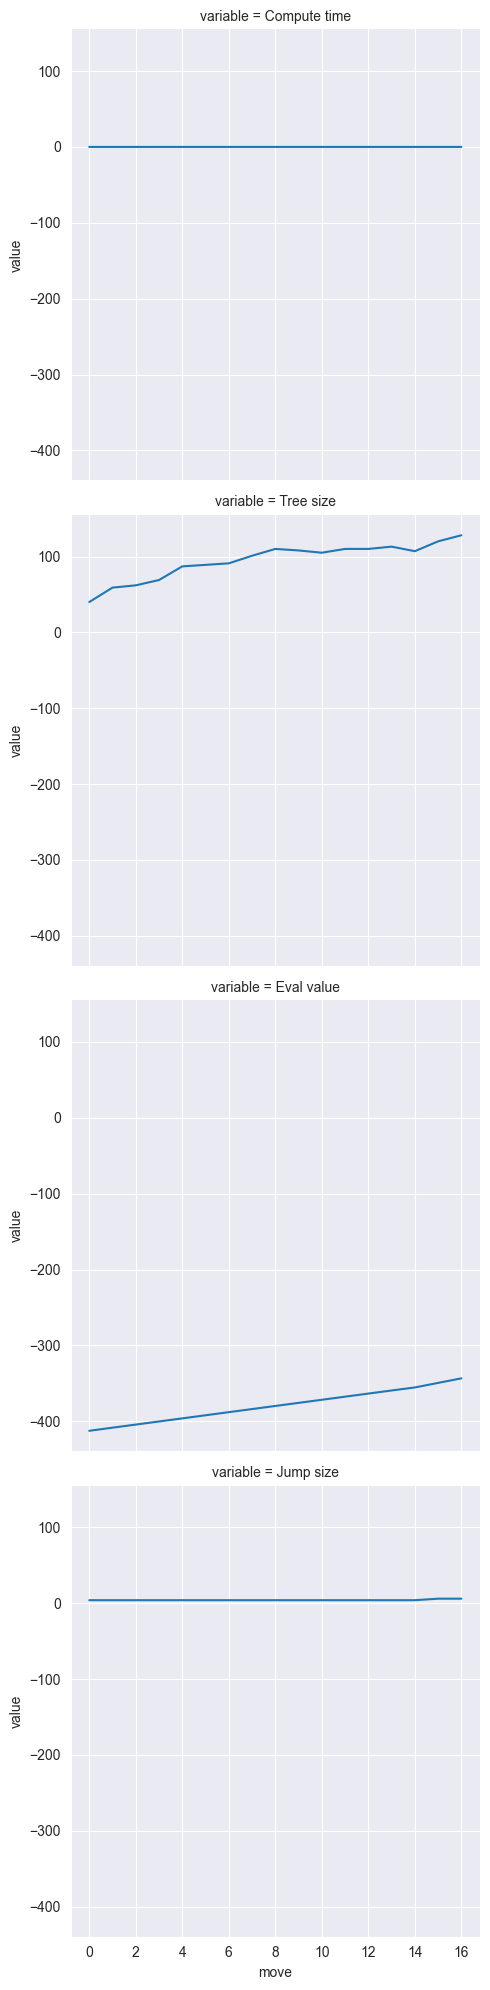

In [35]:
sns.relplot(player_white_long, x='move', y='value',
            kind='line', row='variable')

In [128]:
def plot_compare_two_players(df1, df2, var, colors=('orange', 'blue'), line_styles=('solid', 'dashed')):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    moves = np.arange(len(df1))
    
    plt.title(f'Compare {var} for {df1.player} vs {df2.player}')
    
    ax1.plot(moves, df1[var], color=colors[0], linestyle=line_styles[0], label=df1.player)
    ax1.set_xlabel('Move')
    ax1.set_ylabel(var)
    
    moves = np.arange(len(df2))
    ax2 = ax1.twinx()
    ax2.plot(moves, df2[var], color=colors[1], linestyle=line_styles[1], label=df2.player)
    ax2.set_ylabel(var)
    
    fig.legend()
    
    plt.show()

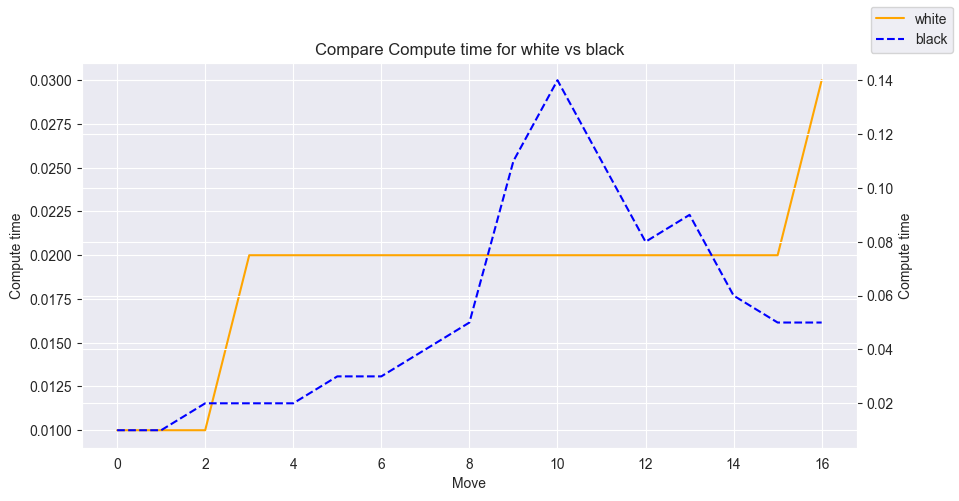

In [127]:
plot_compare_two_players(player_white, player_black, 'Compute time')

In [120]:
def plot_compare_two_variables(df, var1, var2, colors=('orange', 'blue'), line_styles=('solid', 'dashed')):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    moves = np.arange(len(df))
    
    plt.title(f'Compare {var1} vs {var2} for {df.player} player with strategy {df.strategy}, {df.algorithm}, d={df.depth}')
    
    ax1.plot(moves, df[var1], color=colors[0], linestyle=line_styles[0], label=var1)
    ax1.set_xlabel('Move')
    ax1.set_ylabel(var1)
    
    ax2 = ax1.twinx()
    ax2.plot(moves, df[var2], color=colors[1], linestyle=line_styles[1], label=var2)
    ax2.set_ylabel(var2)
    
    fig.legend()
    
    plt.show()

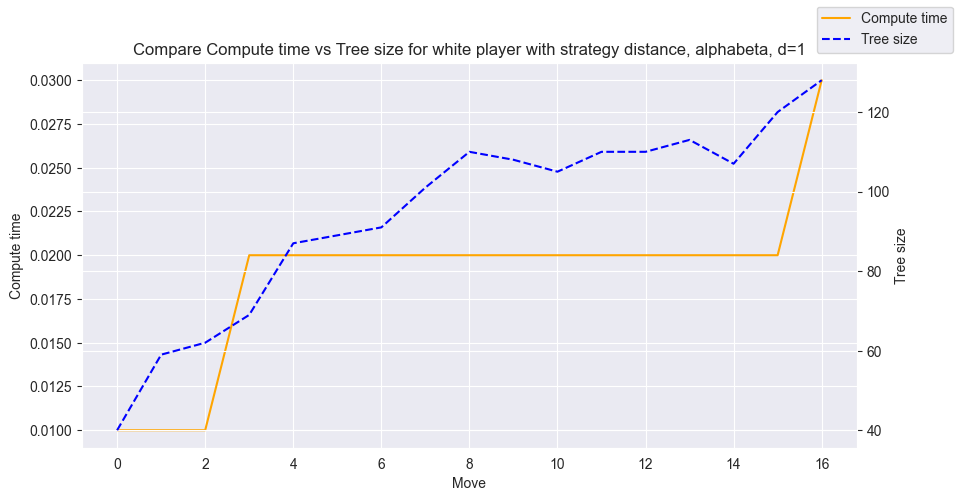

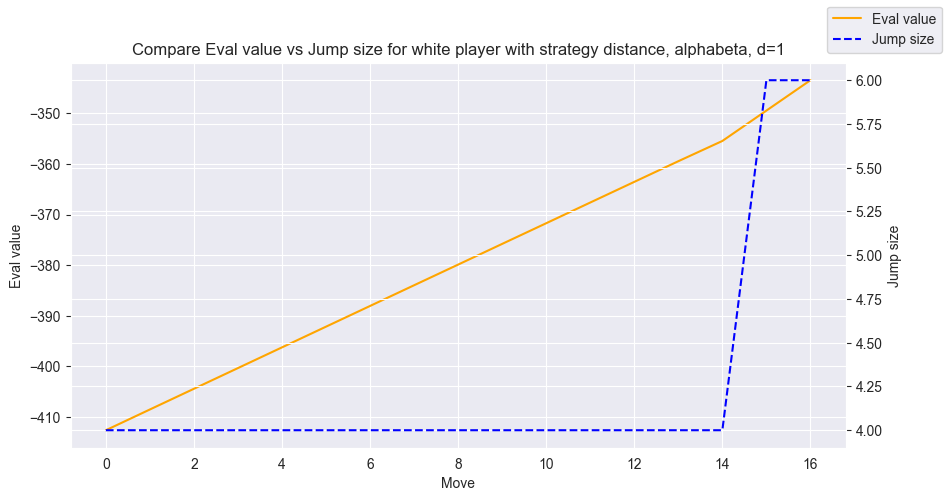

In [121]:
plot_compare_two_variables(player_white, 'Compute time', 'Tree size')
plot_compare_two_variables(player_white, 'Eval value', 'Jump size')

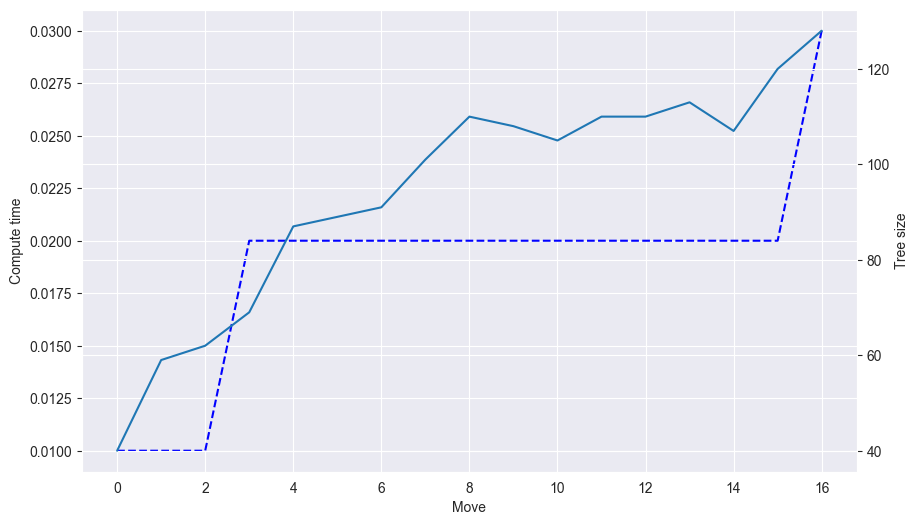

In [94]:
fig, ax1 = plt.subplots(figsize=(10, 6))

moves = np.arange(len(player_white))

ax1.plot(moves, player_white['Compute time'], 'b--')
ax1.set_xlabel('Move')
ax1.set_ylabel('Compute time')

ax2 = ax1.twinx()
ax2.plot(moves, player_white['Tree size'])
ax2.set_ylabel('Tree size')

plt.show()

In [8]:
player_black

,Move from,Move to,Compute time,Tree size,Eval value,Jump size
0,"0,2","2,4",0.01,40,-412.61,4
1,"1,1","1,5",0.01,56,-408.51,4
2,"2,0","4,2",0.02,72,-404.42,4
3,"0,3","2,5",0.02,88,-400.33,4
4,"1,2","3,4",0.02,100,-396.24,4
5,"2,1","4,3",0.03,112,-392.15,4
6,"3,0","5,2",0.03,123,-388.06,4
7,"0,4","2,6",0.04,147,-383.97,4
8,"3,1","1,7",0.05,163,-379.89,8
9,"1,3","3,5",0.11,227,-375.80,4


In [59]:
player_black[['Compute time', 'Tree size', 'Eval value', 'Jump size']].agg([np.mean, np.sum, np.median])

C:\Users\julia\AppData\Local\Temp\ipykernel_25148\4035249089.py:1: FutureWarning: The provided callable <function mean at 0x000001B07E3C7420> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  player_black[['Compute time', 'Tree size', 'Eval value', 'Jump size', 'Player']].agg([np.mean, np.sum, np.median])
C:\Users\julia\AppData\Local\Temp\ipykernel_25148\4035249089.py:1: FutureWarning: The provided callable <function sum at 0x000001B07E3C6340> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  player_black[['Compute time', 'Tree size', 'Eval value', 'Jump size', 'Player']].agg([np.mean, np.sum, np.median])
C:\Users\julia\AppData\Local\Temp\ipykernel_25148\4035249089.py:1: FutureWarning: The provided callable <function median at 0x000001B07E4FF7E0> is currentl

TypeError: Could not convert string 'blackblackblackblackblackblackblackblackblackblackblackblackblackblackblackblackblack' to numeric

In [250]:
def get_match_stats(player_white, player_black):
    total_stats = []
    for (df, player) in zip([player_black, player_white], ['Black', 'White']):
        stats_df = df[['Compute time', 'Tree size', 'Eval value', 'Jump size']].agg([np.mean, np.sum, np.max, np.min])
        stats_df['player'] = player
        stats_df['strategy'] = df.strategy
        stats_df['algorithm'] = df.algorithm
        stats_df['depth'] = df.depth
        stats_df['match'] = df.match
        stats_df['winner'] = df.winner
        total_stats.append(stats_df)
    return pd.concat(total_stats).apply(lambda x: np.round(x, 2))
    

In [ ]:
def summarize_matches(dfs):
    

In [251]:
player_black_2, player_white_2 = read_match(halma_dir.joinpath('alphabeta-alphabeta/2-2/STRATEGY.STATIC_WEIGHTS-STRATEGY.STATIC_WEIGHTS'), '28-0804')


In [252]:
match_stats_2 = get_match_stats(player_white_2, player_black_2)

C:\Users\julia\AppData\Local\Temp\ipykernel_28808\3807083518.py:4: FutureWarning: The provided callable <function mean at 0x00000194A6733BA0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  stats_df = df[['Compute time', 'Tree size', 'Eval value', 'Jump size']].agg([np.mean, np.sum, np.max, np.min])
C:\Users\julia\AppData\Local\Temp\ipykernel_28808\3807083518.py:4: FutureWarning: The provided callable <function sum at 0x00000194A6732AC0> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  stats_df = df[['Compute time', 'Tree size', 'Eval value', 'Jump size']].agg([np.mean, np.sum, np.max, np.min])
C:\Users\julia\AppData\Local\Temp\ipykernel_28808\3807083518.py:4: FutureWarning: The provided callable <function max at 0x00000194A67331A0> is currently using Ser

In [253]:
player_black_2.winner

'PLAYER.WHITE'

In [254]:
match_stats_2

,Compute time,Tree size,Eval value,Jump size,player,strategy,algorithm,depth,match,winner
mean,0.61,765.50,NaN,3.49,Black,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
sum,74.75,93391.00,0.0,426.00,Black,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
max,4.25,1776.00,NaN,12.00,Black,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
min,0.04,119.00,NaN,1.00,Black,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
mean,1.17,1011.61,NaN,4.02,White,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
sum,142.95,123417.00,0.0,490.00,White,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
max,6.93,2108.00,NaN,14.00,White,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
min,0.11,215.00,NaN,1.00,White,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE


In [255]:
match_stats = get_match_stats(player_white, player_black)

C:\Users\julia\AppData\Local\Temp\ipykernel_28808\3807083518.py:4: FutureWarning: The provided callable <function mean at 0x00000194A6733BA0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  stats_df = df[['Compute time', 'Tree size', 'Eval value', 'Jump size']].agg([np.mean, np.sum, np.max, np.min])
C:\Users\julia\AppData\Local\Temp\ipykernel_28808\3807083518.py:4: FutureWarning: The provided callable <function sum at 0x00000194A6732AC0> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  stats_df = df[['Compute time', 'Tree size', 'Eval value', 'Jump size']].agg([np.mean, np.sum, np.max, np.min])
C:\Users\julia\AppData\Local\Temp\ipykernel_28808\3807083518.py:4: FutureWarning: The provided callable <function max at 0x00000194A67331A0> is currently using Ser

In [256]:
match_stats = pd.concat([match_stats, match_stats_2])

In [257]:
match_stats

,Compute time,Tree size,Eval value,Jump size,player,strategy,algorithm,depth,match,winner
mean,0.05,157.71,-379.81,4.35,Black,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
sum,0.92,2681.00,-6456.76,74.00,Black,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
max,0.14,247.00,-345.47,8.00,Black,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
min,0.01,40.00,-412.61,4.00,Black,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
mean,0.02,94.65,-379.57,4.24,White,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
sum,0.32,1609.00,-6452.76,72.00,White,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
max,0.03,128.00,-343.47,6.00,White,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
min,0.01,40.00,-412.61,4.00,White,distance,alphabeta,1,alphabeta-alphabeta1-1STRATEGY.DISTANCE-STRATE...,None
mean,0.61,765.50,NaN,3.49,Black,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE
sum,74.75,93391.00,0.00,426.00,Black,static_weights,alphabeta,2,alphabeta-alphabeta2-2STRATEGY.STATIC_WEIGHTS-...,PLAYER.WHITE


In [152]:
long_stats = match_stats.reset_index().melt(id_vars=['index', 'Player'], value_vars=['Compute time', 'Tree size', 'Eval value', 'Jump size'])

In [153]:
long_stats

,index,Player,variable,value
0,mean,Black,Compute time,0.05
1,sum,Black,Compute time,0.92
2,mean,White,Compute time,0.02
3,sum,White,Compute time,0.32
4,mean,Total,Compute time,0.04
5,sum,Total,Compute time,1.24
6,mean,Black,Tree size,157.71
7,sum,Black,Tree size,2681.00
8,mean,White,Tree size,94.65
9,sum,White,Tree size,1609.00


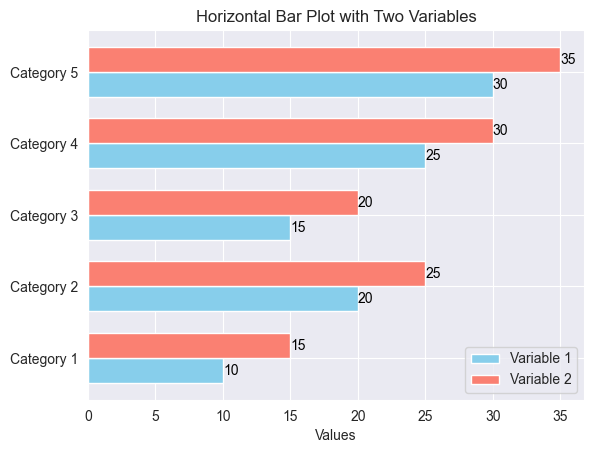

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values1 = [10, 20, 15, 25, 30]  # First variable
values2 = [15, 25, 20, 30, 35]  # Second variable

# Set the positions for the bars
positions = np.arange(len(categories))
bar_width = 0.35  # Width of the bars

# Create the horizontal bar plot
bars1 = plt.barh(positions - bar_width/2, values1, bar_width, color='skyblue', label='Variable 1')
bars2 = plt.barh(positions + bar_width/2, values2, bar_width, color='salmon', label='Variable 2')

# Add annotations for each bar
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_width(), bar1.get_y() + bar1.get_height()/2, str(int(bar1.get_width())), ha='left', va='center', color='black', fontsize=10)
    plt.text(bar2.get_width(), bar2.get_y() + bar2.get_height()/2, str(int(bar2.get_width())), ha='left', va='center', color='black', fontsize=10)

# Customize the plot
plt.yticks(positions, categories)
plt.xlabel('Values')
plt.title('Horizontal Bar Plot with Two Variables')
plt.legend()

# Show plot
plt.show()


In [258]:
def compare_matches(df, stat, var):
    _df = df.loc[stat].sort_values(by=['match', 'player'])
    positions = np.arange(len(_df) // 2) # number of matches to compare
    bar_width = 0.35
    
    black_players = _df.loc[_df['player'] == 'Black']
    white_players = _df.loc[_df['player'] == 'White']
    
    bars1 = plt.barh(positions - bar_width/2, black_players[var], bar_width, color='skyblue', label=f'Black')
    bars2 = plt.barh(positions + bar_width/2, white_players[var], bar_width, color='salmon', label='White')   
    
    plt.xlabel(var)
    
    def create_annotation(row):
        return f'{row["strategy"]}, {row["algorithm"]}, d={row["depth"]}'
    
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        plt.text(bar1.get_width(), bar1.get_y() + bar1.get_height()/2, create_annotation(black_players.iloc[i]), ha='left', va='center', color='black', fontsize=10)
        plt.text(bar2.get_width(), bar2.get_y() + bar2.get_height()/2, create_annotation(white_players.iloc[i]), ha='left', va='center', color='black', fontsize=10)
    
    plt.yticks(positions, black_players['winner'])
    
    plt.title(f'Compare {stat} of {var} across matches')
    plt.legend()
    

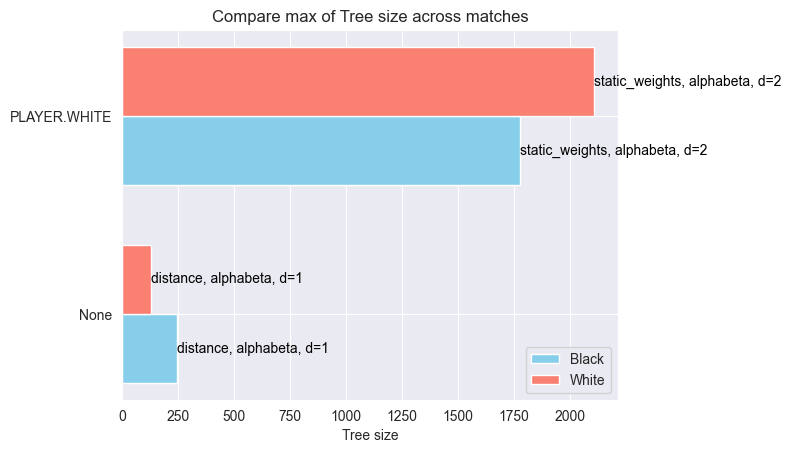

In [259]:
compare_matches(match_stats, 'max', 'Tree size')

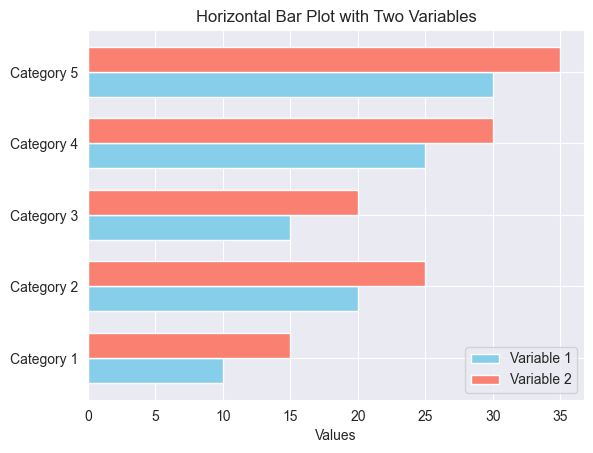

In [192]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values1 = [10, 20, 15, 25, 30]  # First variable
values2 = [15, 25, 20, 30, 35]  # Second variable

# Set the positions for the bars
positions = np.arange(len(categories))
bar_width = 0.35  # Width of the bars

# Create the horizontal bar plot
plt.barh(positions - bar_width/2, values1, bar_width, color='skyblue', label='Variable 1')
plt.barh(positions + bar_width/2, values2, bar_width, color='salmon', label='Variable 2')

# Customize the plot
plt.yticks(positions, categories)
plt.xlabel('Values')
plt.title('Horizontal Bar Plot with Two Variables')
plt.legend()

# Show plot
plt.show()



In [281]:
vars = ['depth', 'algorithm']
_match = match_stats.loc['mean', ['Compute time', *vars]].groupby(vars).mean().reset_index()

In [282]:
_match[_match['depth']]

,depth,algorithm,Compute time
0,1,alphabeta,0.035
1,2,alphabeta,0.890


In [294]:
def compare_algorithms(df, stat, var, depths):
    vars = ['depth', 'algorithm']
    _df = df.loc[stat, [var, *vars]].groupby(vars).mean().reset_index().sort_values(by=['algorithm', 'depth'])
    _df = _df.loc[_df['depth'].isin(depths)]
    positions = np.arange(len(_df))  # number of matches to compare
    bar_width = 0.35
    
    bars1 = plt.bar(positions - bar_width / 2, _df.loc[_df['algorithm'] == 'alphabeta', var], bar_width, color='skyblue', label='alphabeta')
    bars2 = plt.bar(positions + bar_width / 2, _df[_df['algorithm'] == 'minmax', var], bar_width, color='salmon', label='White')

    plt.xticks(positions, depths)
    plt.xlabel('Depth')
    plt.ylabel('Compute time')

    plt.title(f'Compare {stat} of {var} across matches')
    plt.legend()

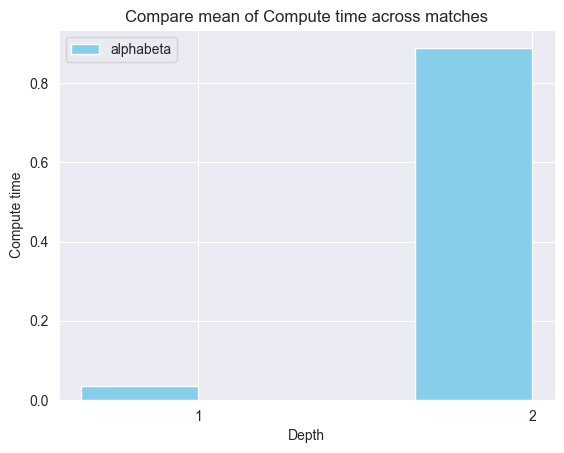

In [295]:
compare_algorithms(match_stats, 'mean', 'Compute time', np.array(['1', '2']))

<Axes: xlabel='index', ylabel='value'>

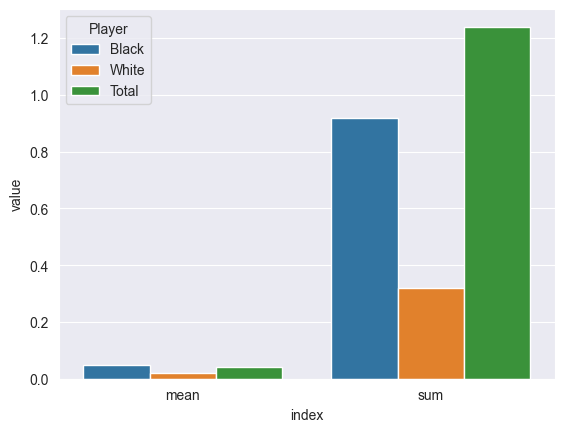

In [154]:
sns.barplot(long_stats[long_stats['variable'] == 'Compute time'], x='index', y='value', hue='Player')

In [ ]:
plt.subplots(2, 2, figsize=(10, 12))

plt.bar(x=)

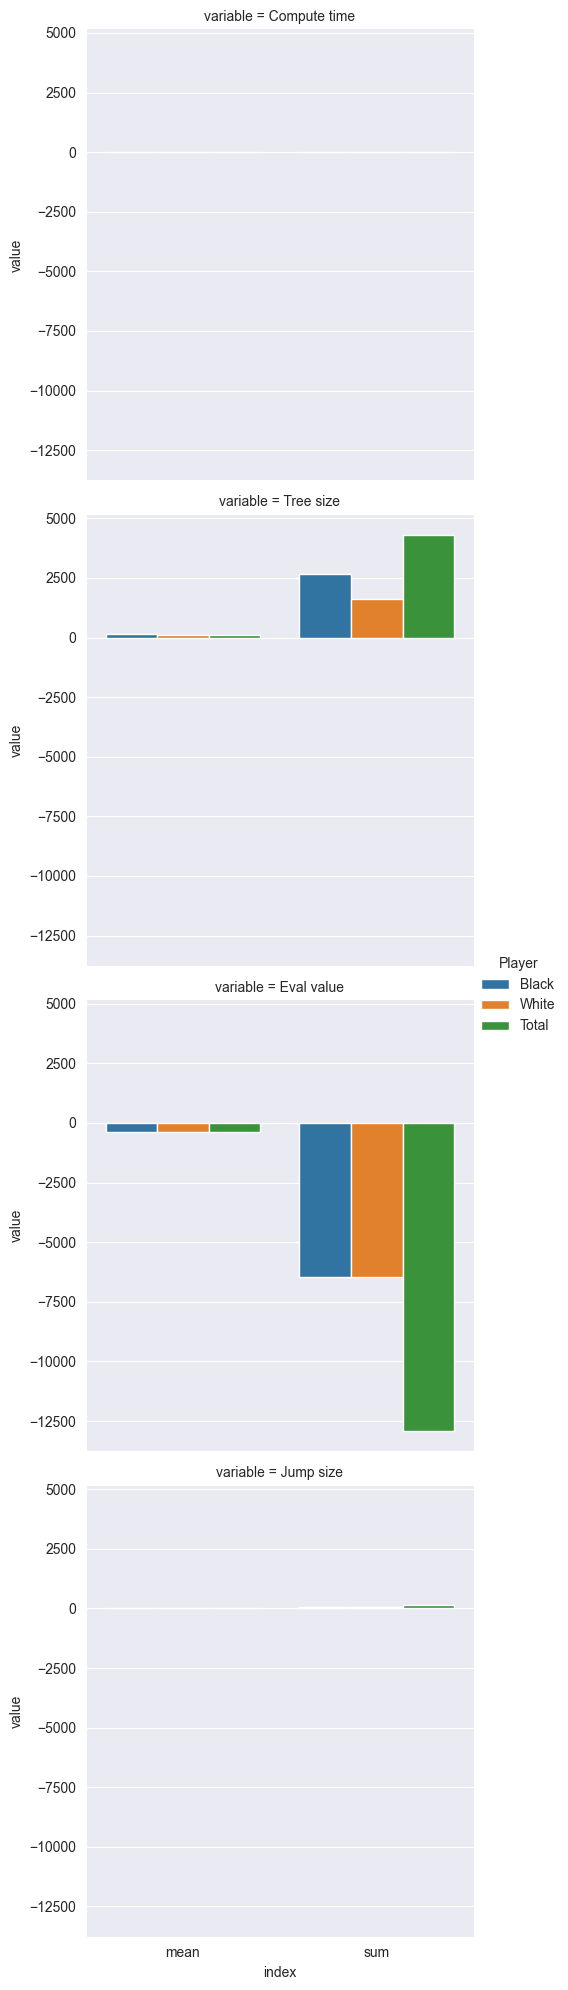

In [155]:
sns.catplot(long_stats, kind='bar', x='index', y='value', hue='Player', row='variable')

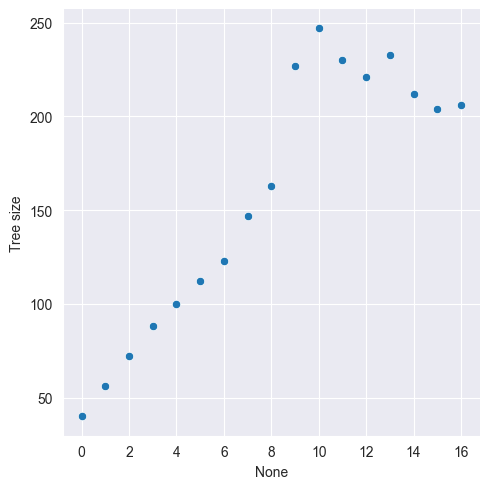

In [13]:
sns.relplot(player_black, y='Tree size', x=player_black.index)